In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex

In [ ]:
df = pd.read_csv('/content/005930.KS.csv')

In [ ]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-28,59400.0,59400.0,58300.0,58800.0,54213.761719,23664541
1,2020-01-29,59100.0,59700.0,58800.0,59100.0,54490.363281,16446102
2,2020-01-30,58800.0,58800.0,56800.0,57200.0,52738.558594,20821939
3,2020-01-31,57800.0,58400.0,56400.0,56400.0,52000.964844,19749457
4,2020-02-03,55500.0,57400.0,55200.0,57200.0,52738.558594,23995260


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
710,2022-12-12,59900.0,60000.0,59400.0,59500.0,59500.0,9036472
711,2022-12-13,59600.0,60300.0,59400.0,59700.0,59700.0,9040873
712,2022-12-14,59800.0,60600.0,59800.0,60500.0,60500.0,8207485
713,2022-12-15,59800.0,60200.0,59300.0,59300.0,59300.0,8716039
714,2022-12-16,58300.0,59500.0,58300.0,59500.0,59500.0,13033596


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,715.000000,715.000000,715.000000,715.000000,715.000000,7.150000e+02
mean,67076.923077,67684.475524,66457.552448,67029.090909,64785.496367,1.833835e+07
std,11229.429948,11262.390480,11194.382233,11211.211994,11396.143509,8.992726e+06
min,42600.000000,43550.000000,42300.000000,42500.000000,39185.121094,0.000000e+00
25%,58000.000000,58750.000000,57500.000000,58000.000000,55473.351562,1.293674e+07
50%,67000.000000,67400.000000,66500.000000,66700.000000,65571.812500,1.640949e+07
75%,77450.000000,77900.000000,76800.000000,77400.000000,75562.285157,2.163098e+07
max,90300.000000,96800.000000,89500.000000,91000.000000,87764.804688,9.030618e+07


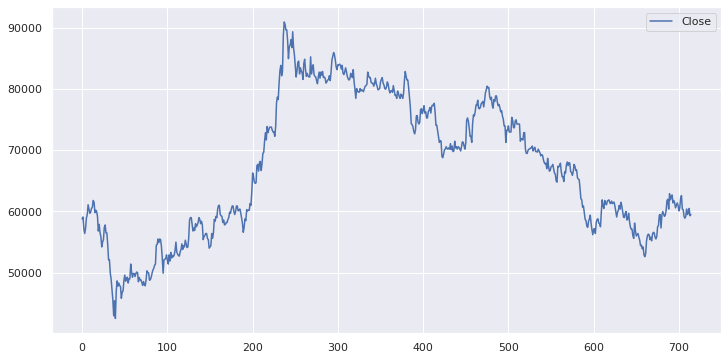

In [ ]:
df[['Close']].plot(figsize=(12,6));


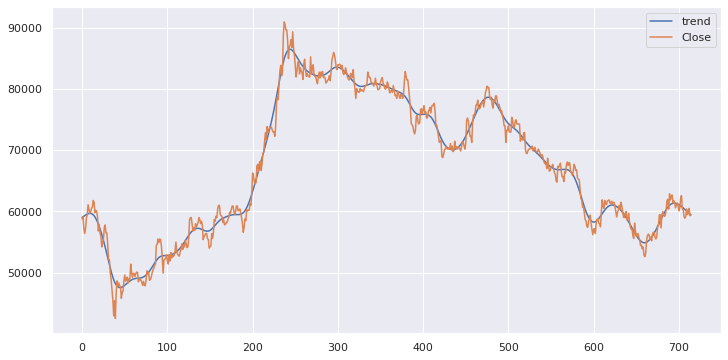

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['Close'], lamb=1600)
df['trend'] = gdp_trend
df[['trend','Close']].plot(figsize=(12,6))
#tendencia

In [ ]:
sts.adfuller(df.Close)
#no se rechaza la hipotesis nula
#la serie no es estacionaria

(-1.284184546867543,
 0.6363764858240066,
 0,
 714,
 {'1%': -3.4395418285955563,
  '5%': -2.865596454500293,
  '10%': -2.5689301318958955},
 11643.145486240745)

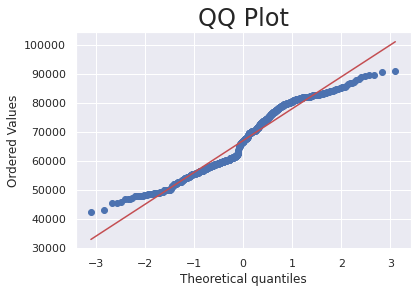

In [ ]:
import scipy.stats

scipy.stats.probplot(df.Close, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [ ]:
df['returns'] = df.Close.pct_change(1)*100

In [ ]:
df['sq_returns'] = df.returns.mul(df.returns)


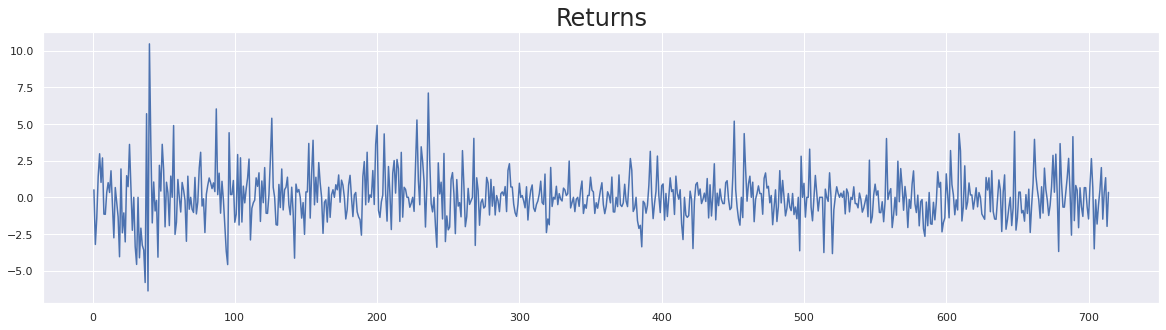

In [ ]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()


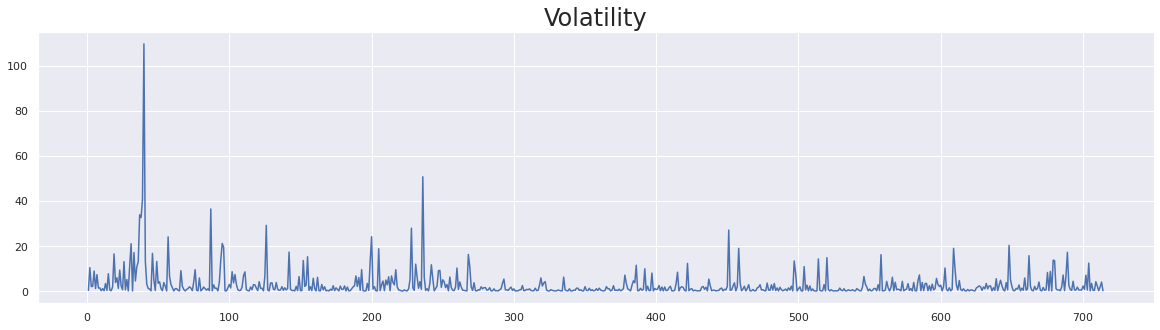

In [ ]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

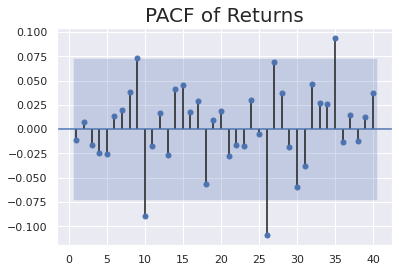

In [ ]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

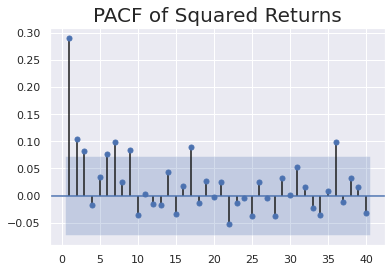

In [ ]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [ ]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 11.9 MB/s eta 0:00:00


In [ ]:
from arch import arch_model


In [ ]:
display(Math(r'\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p \alpha_1\in_{t-1}^2'))
#Modelo ARCH

<IPython.core.display.Math object>

In [ ]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 1)
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 4364302854.194756
Iteration:      2,   Func. Count:     12,   Neg. LLF: 399513577.5002254
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1512.3024664287354
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1354.6699692249335
Iteration:      5,   Func. Count:     28,   Neg. LLF: 1354.6699667808307
Iteration:      6,   Func. Count:     31,   Neg. LLF: 1354.6699667808268
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1354.6699667808307
            Iterations: 6
            Function evaluations: 31
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1354.67
Distribution:                  Normal   AIC:                           2715.34
Method:            Maximum Likelihood   BIC:                           2729.05
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:02:07   Df Model:                            1
                                Mean Model                               
=========================================================================
                  coef    std err          t      P>|t|  95.0% Conf. Int.
-------------------------------------------------------------------------
mu         -1.6518e-03  5.750e-02 -2.873e-02      0.977 [ -0.114,  0.111]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          2.1713      0.191     11.379  5.302e-30   [  1.797,  2.545]
alpha[1]       0.2022  5.760e-02      3.510  4.485e-04 [8.927e-02,  0.315]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     33,   Neg. LLF: 1352.718422906516
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1352.7092482675512
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1352.71
Distribution:                  Normal   AIC:                           2713.42
Method:            Maximum Likelihood   BIC:                           2731.70
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:02:07   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0117  5.773e-02      0.203      0.839 [ -0.101,  0.125]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.9875      0.223      8.919  4.688e-19    [  1.551,  2.424]
alpha[1]       0.1758  5.903e-02      2.979  2.896e-03  [6.013e-02,  0.292]
alpha[2]       0.0974  8.281e-02      1.176      0.240 [-6.491e-02,  0.260]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 1353.4891142562767
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1352.2210676574111
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1352.2210676574111
            Iterations: 11
            Function evaluations: 76
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1352.22
Distribution:                  Normal   AIC:                           2714.44
Method:            Maximum Likelihood   BIC:                           2737.30
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:02:07   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0174  5.973e-02      0.292      0.771 [-9.966e-02,  0.134]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.9181      0.249      7.702  1.337e-14    [  1.430,  2.406]
alpha[1]       0.1664  6.057e-02      2.747  6.018e-03  [4.766e-02,  0.285]
alpha[2]       0.0926  8.254e-02      1.122      0.262 [-6.919e-02,  0.254]
alpha[3]       0.0386  5.883e-02      0.657      0.511 [-7.668e-02,  0.154]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     87,   Neg. LLF: 2550.9041886706664
Iteration:     10,   Func. Count:    174,   Neg. LLF: 1366.5999967532807
Iteration:     15,   Func. Count:    261,   Neg. LLF: 1336.1982166613775
Iteration:     20,   Func. Count:    346,   Neg. LLF: 1332.732415094219
Iteration:     25,   Func. Count:    427,   Neg. LLF: 1332.7097192655658
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1332.7097182293091
            Iterations: 27
            Function evaluations: 458
            Gradient evaluations: 27


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1332.71
Distribution:                  Normal   AIC:                           2695.42
Method:            Maximum Likelihood   BIC:                           2763.98
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:02:08   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0122  6.135e-02      0.198      0.843 [ -0.108,  0.132]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          1.0483      0.390      2.686  7.231e-03      [  0.283,  1.813]
alpha[1]       0.1651  6.578e-02      2.509  1.210e-02    [3.612e-02,  0.294]
alpha[2]       0.0304  7.137e-02      0.426      0.670      [ -0.110,  0.170]
alpha[3]       0.0197  3.470e-02      0.567      0.571 [-4.834e-02,8.769e-02]
alpha[4]       0.0137  3.753e-02      0.366      0.714 [-5.983e-02,8.730e-02]
alpha[5]   5.1158e-13  8.293e-02  6.169e-12      1.000      [ -0.163,  0.163]
alpha[6]       0.0642  5.132e-02      1.250      0.211   [-3.641e-02,  0.165]
alpha[7]       0.0846  3.808e-02      2.222  2.628e-02    [9.982e-03,  0.159]
alpha[8]       0.1491  8.219e-02      1.814  6.973e-02   [-1.203e-02,  0.310]
alpha[9]   5.7499e-13  4.692e-02  1.225e-11      1.000 [-9.197e-02,9.197e-02]
alpha[10]      0.0272  3.904e-02      0.698      0.485   [-4.929e-02,  0.104]
alpha[11]      0.0335  4.168e-02      0.803      0.422   [-4.821e-02,  0.115]
alpha[12]  1.9903e-13  9.345e-02  2.130e-12      1.000      [ -0.183,  0.183]
alpha[13]      0.0434  9.852e-02      0.441      0.659      [ -0.150,  0.237]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t^2 = \Omega + \sum_{i=1}^p\alpha_1\in_{t-1}^2 + \sum_{j=1}^p\beta_1\sigma_{t-1}^2'))
#Modelo GARCH

<IPython.core.display.Math object>

In [ ]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 1340.0169846643078
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1340.0163753367078
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1340.02
Distribution:                  Normal   AIC:                           2688.03
Method:            Maximum Likelihood   BIC:                           2706.32
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:02:08   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu         8.0178e-03  5.536e-02      0.145      0.885 [ -0.100,  0.117]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0715      0.113      0.633      0.527    [ -0.150,  0.293]
alpha[1]       0.0628  5.505e-02      1.140      0.254 [-4.511e-02,  0.171]
beta[1]        0.9104  9.304e-02      9.785  1.309e-22    [  0.728,  1.093]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 1346.4341237957333
Iteration:     10,   Func. Count:     73,   Neg. LLF: 1338.830527912006
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1338.830527912006
            Iterations: 11
            Function evaluations: 78
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1338.83
Distribution:                  Normal   AIC:                           2687.66
Method:            Maximum Likelihood   BIC:                           2710.52
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:02:08   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu         1.5381e-03  5.502e-02  2.796e-02      0.978 [ -0.106,  0.109]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1007      0.126      0.799      0.424    [ -0.146,  0.348]
alpha[1]       0.0893  5.949e-02      1.501      0.133 [-2.728e-02,  0.206]
beta[1]        0.3305      0.226      1.461      0.144    [ -0.113,  0.774]
beta[2]        0.5416      0.268      2.024  4.302e-02  [1.702e-02,  1.066]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     47,   Neg. LLF: 1349.5878598027457
Iteration:     10,   Func. Count:     86,   Neg. LLF: 1337.664520585923
Iteration:     15,   Func. Count:    123,   Neg. LLF: 1337.5546290114662
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1337.5546290114662
            Iterations: 16
            Function evaluations: 129
            Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1337.55
Distribution:                  Normal   AIC:                           2687.11
Method:            Maximum Likelihood   BIC:                           2714.53
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:02:08   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu         2.7682e-03  5.578e-02  4.962e-02      0.960 [ -0.107,  0.112]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1170  9.219e-02      1.269      0.204 [-6.371e-02,  0.298]
alpha[1]       0.1201  5.123e-02      2.345  1.901e-02  [1.974e-02,  0.221]
beta[1]        0.1732  6.941e-02      2.495  1.260e-02  [3.712e-02,  0.309]
beta[2]    1.0232e-15      0.119  8.617e-15      1.000    [ -0.233,  0.233]
beta[3]        0.6622      0.136      4.858  1.189e-06    [  0.395,  0.929]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 1340.0369689409163
Iteration:     10,   Func. Count:     72,   Neg. LLF: 1340.016375316457
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1340.016375316457
            Iterations: 10
            Function evaluations: 72
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1340.02
Distribution:                  Normal   AIC:                           2690.03
Method:            Maximum Likelihood   BIC:                           2712.89
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:02:08   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu         8.0126e-03  6.600e-02      0.121      0.903 [ -0.121,  0.137]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0715      0.218      0.328      0.743    [ -0.355,  0.499]
alpha[1]       0.0628  4.817e-02      1.303      0.192 [-3.164e-02,  0.157]
alpha[2]       0.0000      0.154      0.000      1.000    [ -0.302,  0.302]
beta[1]        0.9104      0.198      4.604  4.143e-06    [  0.523,  1.298]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     47,   Neg. LLF: 1340.0809976007881
Iteration:     10,   Func. Count:     82,   Neg. LLF: 1340.01637539973
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1340.01637539973
            Iterations: 11
            Function evaluations: 88
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1340.02
Distribution:                  Normal   AIC:                           2692.03
Method:            Maximum Likelihood   BIC:                           2719.46
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:02:08   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu         8.0132e-03  6.351e-02      0.126      0.900 [ -0.116,  0.132]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0715      0.532      0.134      0.893    [ -0.971,  1.114]
alpha[1]       0.0628  5.104e-02      1.230      0.219 [-3.726e-02,  0.163]
alpha[2]   7.3239e-13      0.124  5.910e-12      1.000    [ -0.243,  0.243]
alpha[3]   6.7162e-13      0.410  1.640e-12      1.000    [ -0.803,  0.803]
beta[1]        0.9104      0.494      1.841  6.557e-02 [-5.865e-02,  1.879]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'ln\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p\alpha_i(|\in_{t-i}|+\gamma_i\in_{t_i}) + \sum_{j=1}^q\beta_j\ln\sigma_{t-j}^2'))
#Modelo EGARCH

<IPython.core.display.Math object>

In [ ]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "EGARCH", p = 1, o = 1, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     46,   Neg. LLF: 1346.506664009332
Iteration:     10,   Func. Count:     80,   Neg. LLF: 1335.5658350571618
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1335.5658350571618
            Iterations: 11
            Function evaluations: 85
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -1335.57
Distribution:                  Normal   AIC:                           2681.13
Method:            Maximum Likelihood   BIC:                           2703.99
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:02:08   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0133  5.627e-02     -0.237      0.813 [ -0.124,9.696e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0270  2.076e-02      1.299      0.194 [-1.373e-02,6.763e-02]
alpha[1]       0.1405  6.047e-02      2.324  2.012e-02    [2.202e-02,  0.259]
gamma[1]      -0.0272  2.465e-02     -1.104      0.270 [-7.552e-02,2.109e-02]
beta[1]        0.9782  1.970e-02     49.658      0.000      [  0.940,  1.017]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t^2 = \omega + \sum_{i=1}^p\alpha\in_{t-1}^2 + \gamma\in_{t-1}^2I_{|\in_{t-1}<0|} + \sum_{j=1}^p\beta\sigma_{t-1}^2 '))
#modelo GJR-GARCH

<IPython.core.display.Math object>

In [ ]:
am = arch_model(df.returns[1:], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1338.42
Distribution:                  Normal   AIC:                           2686.84
Method:            Maximum Likelihood   BIC:                           2709.70
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:02:09   Df Model:                            1
                                Mean Model                               
=========================================================================
                  coef    std err          t      P>|t|  95.0% Conf. Int.
-------------------------------------------------------------------------
mu         -7.4625e-03  5.535e-02     -0.135      0.893 [ -0.116,  0.101]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0610  9.267e-02      0.658      0.511    [ -0.121,  0.243]
alpha[1]       0.0430  3.596e-02      1.197      0.231 [-2.745e-02,  0.114]
gamma[1]       0.0396  3.729e-02      1.061      0.288 [-3.351e-02,  0.113]
beta[1]        0.9168  7.578e-02     12.099  1.068e-33    [  0.768,  1.065]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t = \omega + \sum_{p=1}^1\alpha\in_{t-1} + \sum_{o=1}^o\gamma\in_{t-1}I_{|\in_{t-1}<0|} + \sum_{q=1}^q\beta\sigma_{t-1}'))
#modelo TARCH

<IPython.core.display.Math object>

In [ ]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     42,   Neg. LLF: 1340.1133898449498
Iteration:     10,   Func. Count:     77,   Neg. LLF: 1335.9615897398867
Iteration:     15,   Func. Count:    109,   Neg. LLF: 1335.8803134613684
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1335.8803134629572
            Iterations: 15
            Function evaluations: 109
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -1335.88
Distribution:                  Normal   AIC:                           2681.76
Method:            Maximum Likelihood   BIC:                           2704.62
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:02:09   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0163  5.644e-02     -0.288      0.773 [ -0.127,9.436e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0320  3.098e-02      1.033      0.302 [-2.873e-02,9.271e-02]
alpha[1]       0.0586  2.870e-02      2.043  4.106e-02    [2.381e-03,  0.115]
gamma[1]       0.0288  2.579e-02      1.115      0.265 [-2.178e-02,7.930e-02]
beta[1]        0.9260  3.804e-02     24.345 6.590e-131      [  0.851,  1.001]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'h_t = \omega + [1 - \beta\ L - \phi\ L(1-L)^\delta]\in_t^2 + \beta\ h_{t-1}'))
#modelo FIGARCH

<IPython.core.display.Math object>

In [ ]:
from arch.univariate import FIGARCH

In [ ]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "FIGARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     36,   Neg. LLF: 1343.427144956996
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1340.2089075904298
Iteration:     15,   Func. Count:    101,   Neg. LLF: 1339.173765285688
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1339.1737645155044
            Iterations: 16
            Function evaluations: 107
            Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:               -1339.17
Distribution:                  Normal   AIC:                           2688.35
Method:            Maximum Likelihood   BIC:                           2711.20
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:02:09   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu         7.0379e-03  6.046e-02      0.116      0.907 [ -0.111,  0.126]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.1429      0.545      0.262      0.793 [ -0.924,  1.210]
phi            0.3759      0.658      0.571      0.568 [ -0.914,  1.665]
d              0.2482      0.288      0.861      0.389 [ -0.317,  0.813]
beta           0.5111      0.904      0.565      0.572 [ -1.261,  2.283]
========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t^2 = \omega + \in_{i=1}^m \alpha_l(l_i^{-1} \sum_{j+1}^l \in_{t-j}^2)'))
#modelo HARCH

<IPython.core.display.Math object>

In [ ]:
from arch.univariate import HARCH

In [ ]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "HARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 1534.8952531345687
Iteration:     10,   Func. Count:     60,   Neg. LLF: 1366.347207697369
Iteration:     15,   Func. Count:     80,   Neg. LLF: 1354.6699681462296
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1354.669966825273
            Iterations: 17
            Function evaluations: 87
            Gradient evaluations: 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:               -1354.67
Distribution:                  Normal   AIC:                           2715.34
Method:            Maximum Likelihood   BIC:                           2729.05
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:02:09   Df Model:                            1
                                Mean Model                               
=========================================================================
                  coef    std err          t      P>|t|  95.0% Conf. Int.
-------------------------------------------------------------------------
mu         -1.6709e-03  5.750e-02 -2.906e-02      0.977 [ -0.114,  0.111]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          2.1712      0.191     11.379  5.301e-30   [  1.797,  2.545]
alpha[1]       0.2022  5.760e-02      3.510  4.485e-04 [8.927e-02,  0.315]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t^\delta = \omega + \sum_{i=1}^p\alpha_i(|\in_{t-1}|-\gamma_i\ I_{[0>i]}\in_{t-i})^\delta + \sum_{k=1}^q \beta_k \sigma_{t-k}^\delta'))
#modelo APARCH

<IPython.core.display.Math object>

In [ ]:
from arch.univariate import APARCH


In [ ]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=2.0, vol = "APARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     45,   Neg. LLF: 5763.936625957611
Iteration:     10,   Func. Count:     85,   Neg. LLF: 1424.5717549829433
Iteration:     15,   Func. Count:    123,   Neg. LLF: 1335.8447291182047
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1335.8447291182047
            Iterations: 16
            Function evaluations: 129
            Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - APARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     APARCH   Log-Likelihood:               -1335.84
Distribution:                  Normal   AIC:                           2683.69
Method:            Maximum Likelihood   BIC:                           2711.11
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:02:10   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0168  5.703e-02     -0.294      0.769 [ -0.129,9.502e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0302  3.240e-02      0.931      0.352 [-3.333e-02,9.367e-02]
alpha[1]       0.0693  3.391e-02      2.044  4.099e-02    [2.837e-03,  0.136]
gamma[1]       0.1978      0.185      1.070      0.285      [ -0.165,  0.560]
beta[1]        0.9292  4.176e-02     22.250 1.128e-109      [  0.847,  1.011]
delta          0.9409      0.371      2.534  1.128e-02      [  0.213,  1.669]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
from scipy import stats


In [ ]:
jarque_bera_test = stats.jarque_bera(df.Close)
jarque_bera_test

Jarque_beraResult(statistic=42.87930500738774, pvalue=4.885142290689259e-10)

In [ ]:
jarque_bera_test.statistic

42.87930500738774

In [ ]:
jarque_bera_test.pvalue

4.885142290689259e-10

jarquer-bera para los retornos

In [ ]:
returns = df.returns[1:]
returns

1      0.510204
2     -3.214890
3     -1.398601
4      1.418440
5      2.972028
         ...   
710   -1.490066
711    0.336134
712    1.340034
713   -1.983471
714    0.337268
Name: returns, Length: 714, dtype: float64

In [ ]:
jarque_bera_test = stats.jarque_bera(returns)
jarque_bera_test

Jarque_beraResult(statistic=392.0385173600937, pvalue=0.0)

In [ ]:
jarque_bera_test.statistic

392.0385173600937

In [ ]:
jarque_bera_test.pvalue

0.0

curtosis

In [ ]:
returns.kurt()

3.418677360104433

coef. asimetria

In [ ]:
returns.skew()

0.6552336528995775

In [ ]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns[1:])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -26.965
P-value                         0.000
Lags                               20
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
from arch.unitroot import DFGLS

dfgls = DFGLS(df.returns[1:])
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                -25.131
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -2.60 (1%), -1.97 (5%), -1.65 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
from arch.unitroot import ADF

adf = ADF(df.returns[1:])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -26.966
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns[1:])
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.227
P-value                         0.220
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        715 non-null    object 
 1   Open        715 non-null    float64
 2   High        715 non-null    float64
 3   Low         715 non-null    float64
 4   Close       715 non-null    float64
 5   Adj Close   715 non-null    float64
 6   Volume      715 non-null    int64  
 7   trend       715 non-null    float64
 8   returns     714 non-null    float64
 9   sq_returns  714 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 56.0+ KB


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [ ]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

predictions

BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [ ]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [ ]:
def trading_window(data):

  # 1 day window
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)

  # return the new dataset
  return data

In [ ]:
data = pd.read_csv("/content/005930.KS.csv")

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-28,59400.0,59400.0,58300.0,58800.0,54213.761719,23664541
1,2020-01-29,59100.0,59700.0,58800.0,59100.0,54490.363281,16446102
2,2020-01-30,58800.0,58800.0,56800.0,57200.0,52738.558594,20821939
3,2020-01-31,57800.0,58400.0,56400.0,56400.0,52000.964844,19749457
4,2020-02-03,55500.0,57400.0,55200.0,57200.0,52738.558594,23995260
...,...,...,...,...,...,...,...
710,2022-12-12,59900.0,60000.0,59400.0,59500.0,59500.000000,9036472
711,2022-12-13,59600.0,60300.0,59400.0,59700.0,59700.000000,9040873
712,2022-12-14,59800.0,60600.0,59800.0,60500.0,60500.000000,8207485
713,2022-12-15,59800.0,60200.0,59300.0,59300.0,59300.000000,8716039


In [ ]:
data = data[["Date","Close","Volume"]]


In [ ]:
data

,Date,Close,Volume
0,2020-01-28,58800.0,23664541
1,2020-01-29,59100.0,16446102
2,2020-01-30,57200.0,20821939
3,2020-01-31,56400.0,19749457
4,2020-02-03,57200.0,23995260
...,...,...,...
710,2022-12-12,59500.0,9036472
711,2022-12-13,59700.0,9040873
712,2022-12-14,60500.0,8207485
713,2022-12-15,59300.0,8716039


In [ ]:
price_volume_target_df = trading_window(data)
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-28,58800.0,23664541,59100.0
1,2020-01-29,59100.0,16446102,57200.0
2,2020-01-30,57200.0,20821939,56400.0
3,2020-01-31,56400.0,19749457,57200.0
4,2020-02-03,57200.0,23995260,58900.0
...,...,...,...,...
710,2022-12-12,59500.0,9036472,59700.0
711,2022-12-13,59700.0,9040873,60500.0
712,2022-12-14,60500.0,8207485,59300.0
713,2022-12-15,59300.0,8716039,59500.0


In [ ]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-28,58800.0,23664541,59100.0
1,2020-01-29,59100.0,16446102,57200.0
2,2020-01-30,57200.0,20821939,56400.0
3,2020-01-31,56400.0,19749457,57200.0
4,2020-02-03,57200.0,23995260,58900.0
...,...,...,...,...
709,2022-12-09,60400.0,10529632,59500.0
710,2022-12-12,59500.0,9036472,59700.0
711,2022-12-13,59700.0,9040873,60500.0
712,2022-12-14,60500.0,8207485,59300.0


In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [ ]:
price_volume_target_scaled_df

array([[0.33608247, 0.26204787, 0.34226804],
       [0.34226804, 0.18211492, 0.30309278],
       [0.30309278, 0.23057048, 0.28659794],
       ...,
       [0.35463918, 0.10011356, 0.37113402],
       [0.37113402, 0.09088509, 0.34639175],
       [0.34639175, 0.09651653, 0.35051546]])

In [ ]:
price_volume_target_scaled_df.shape

(714, 3)

In [ ]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [ ]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((714, 2), (714, 1))

In [ ]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [ ]:
X_train.shape, y_train.shape

((464, 2), (464, 1))

In [ ]:
X_test.shape, y_test.shape

((250, 2), (250, 1))

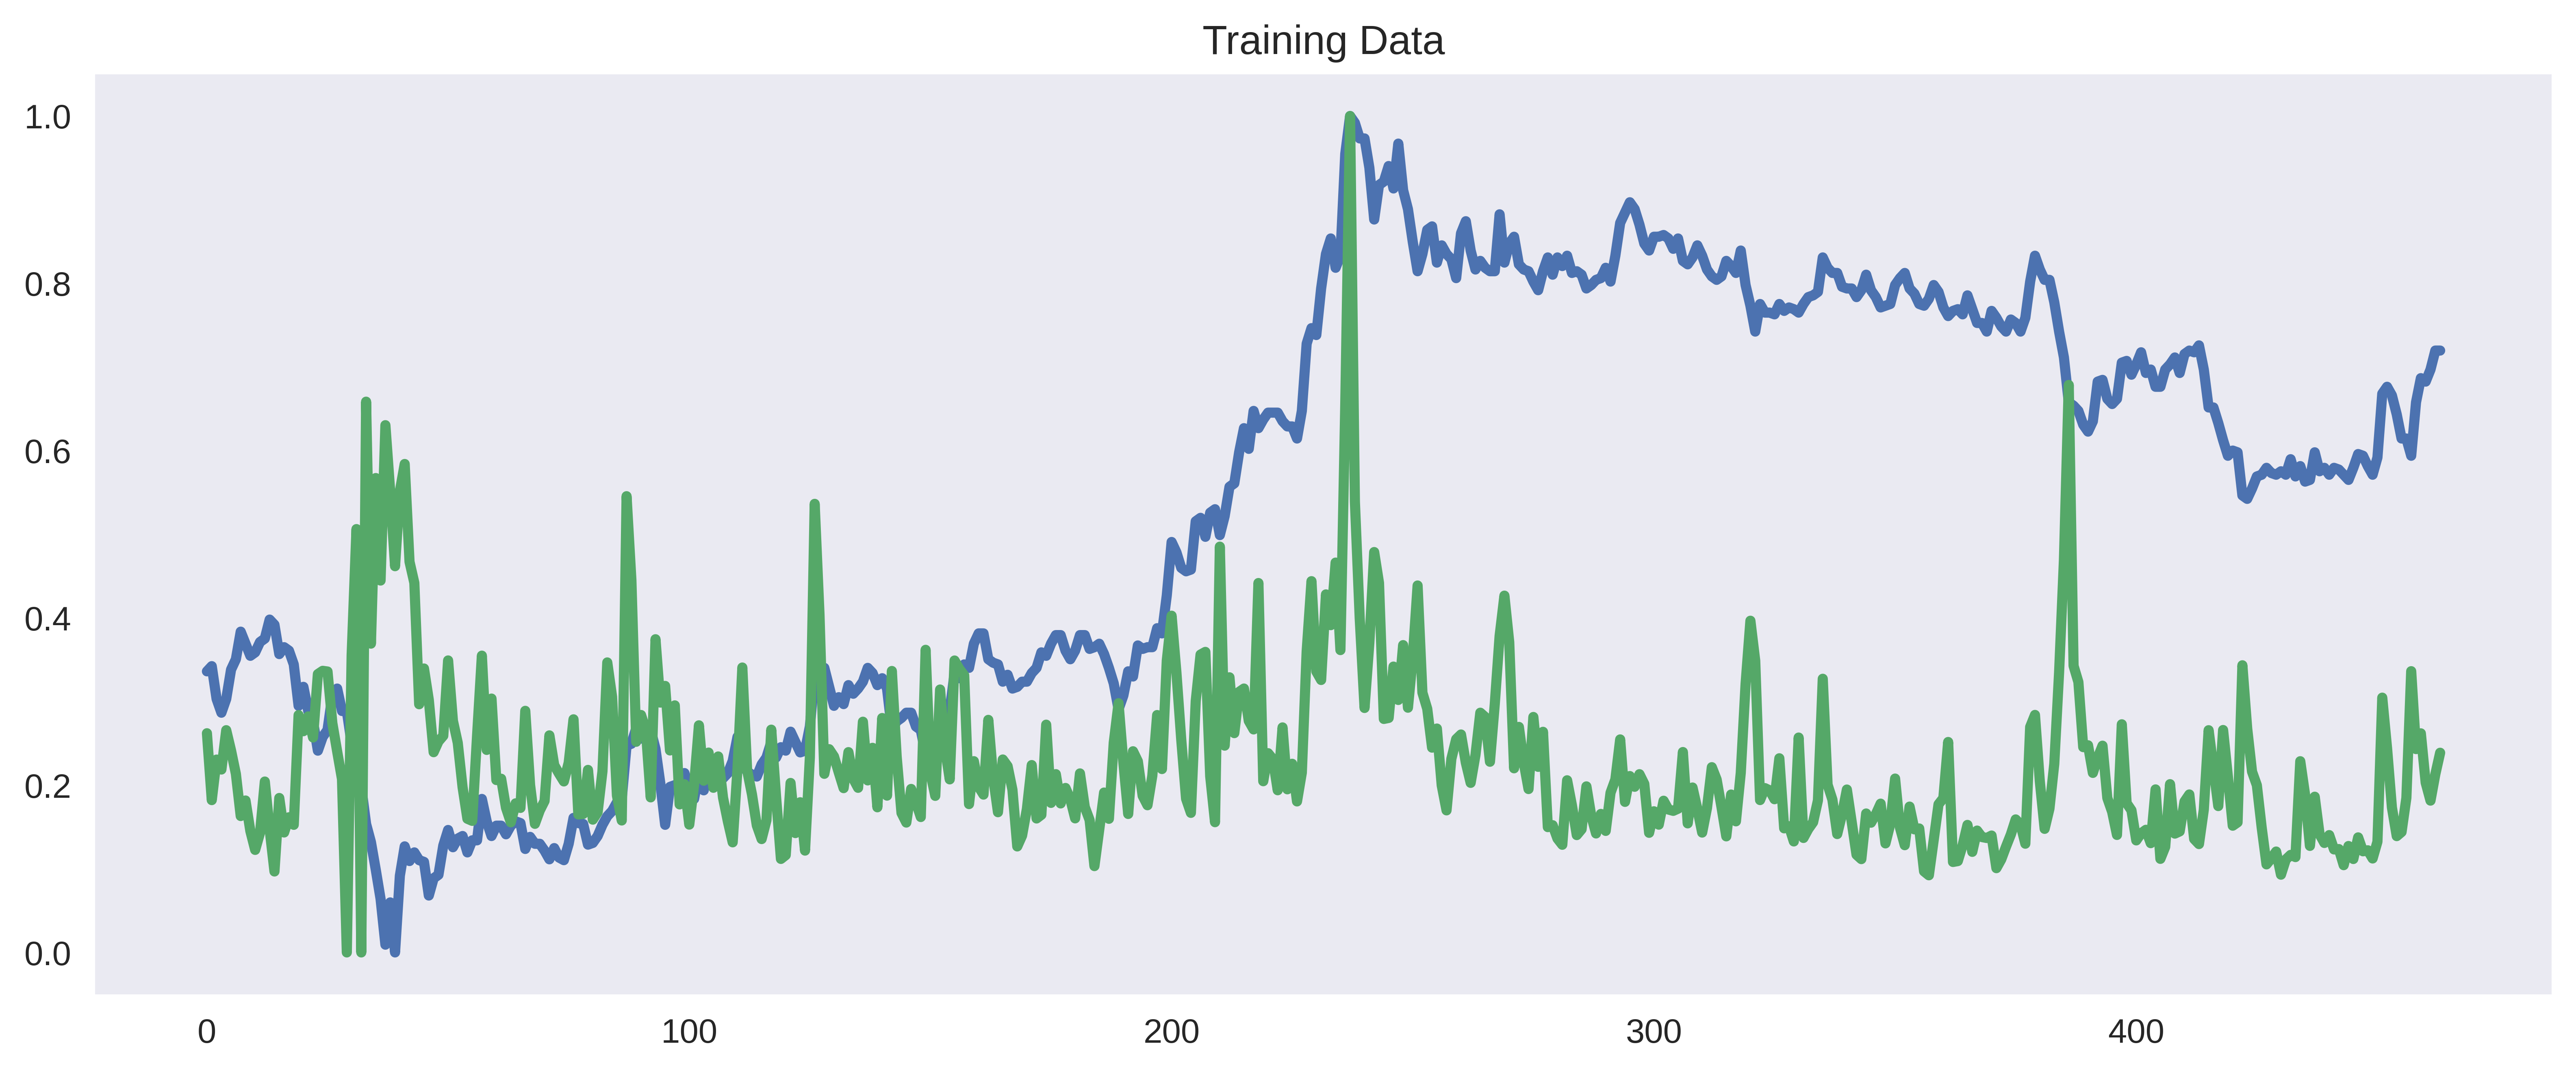

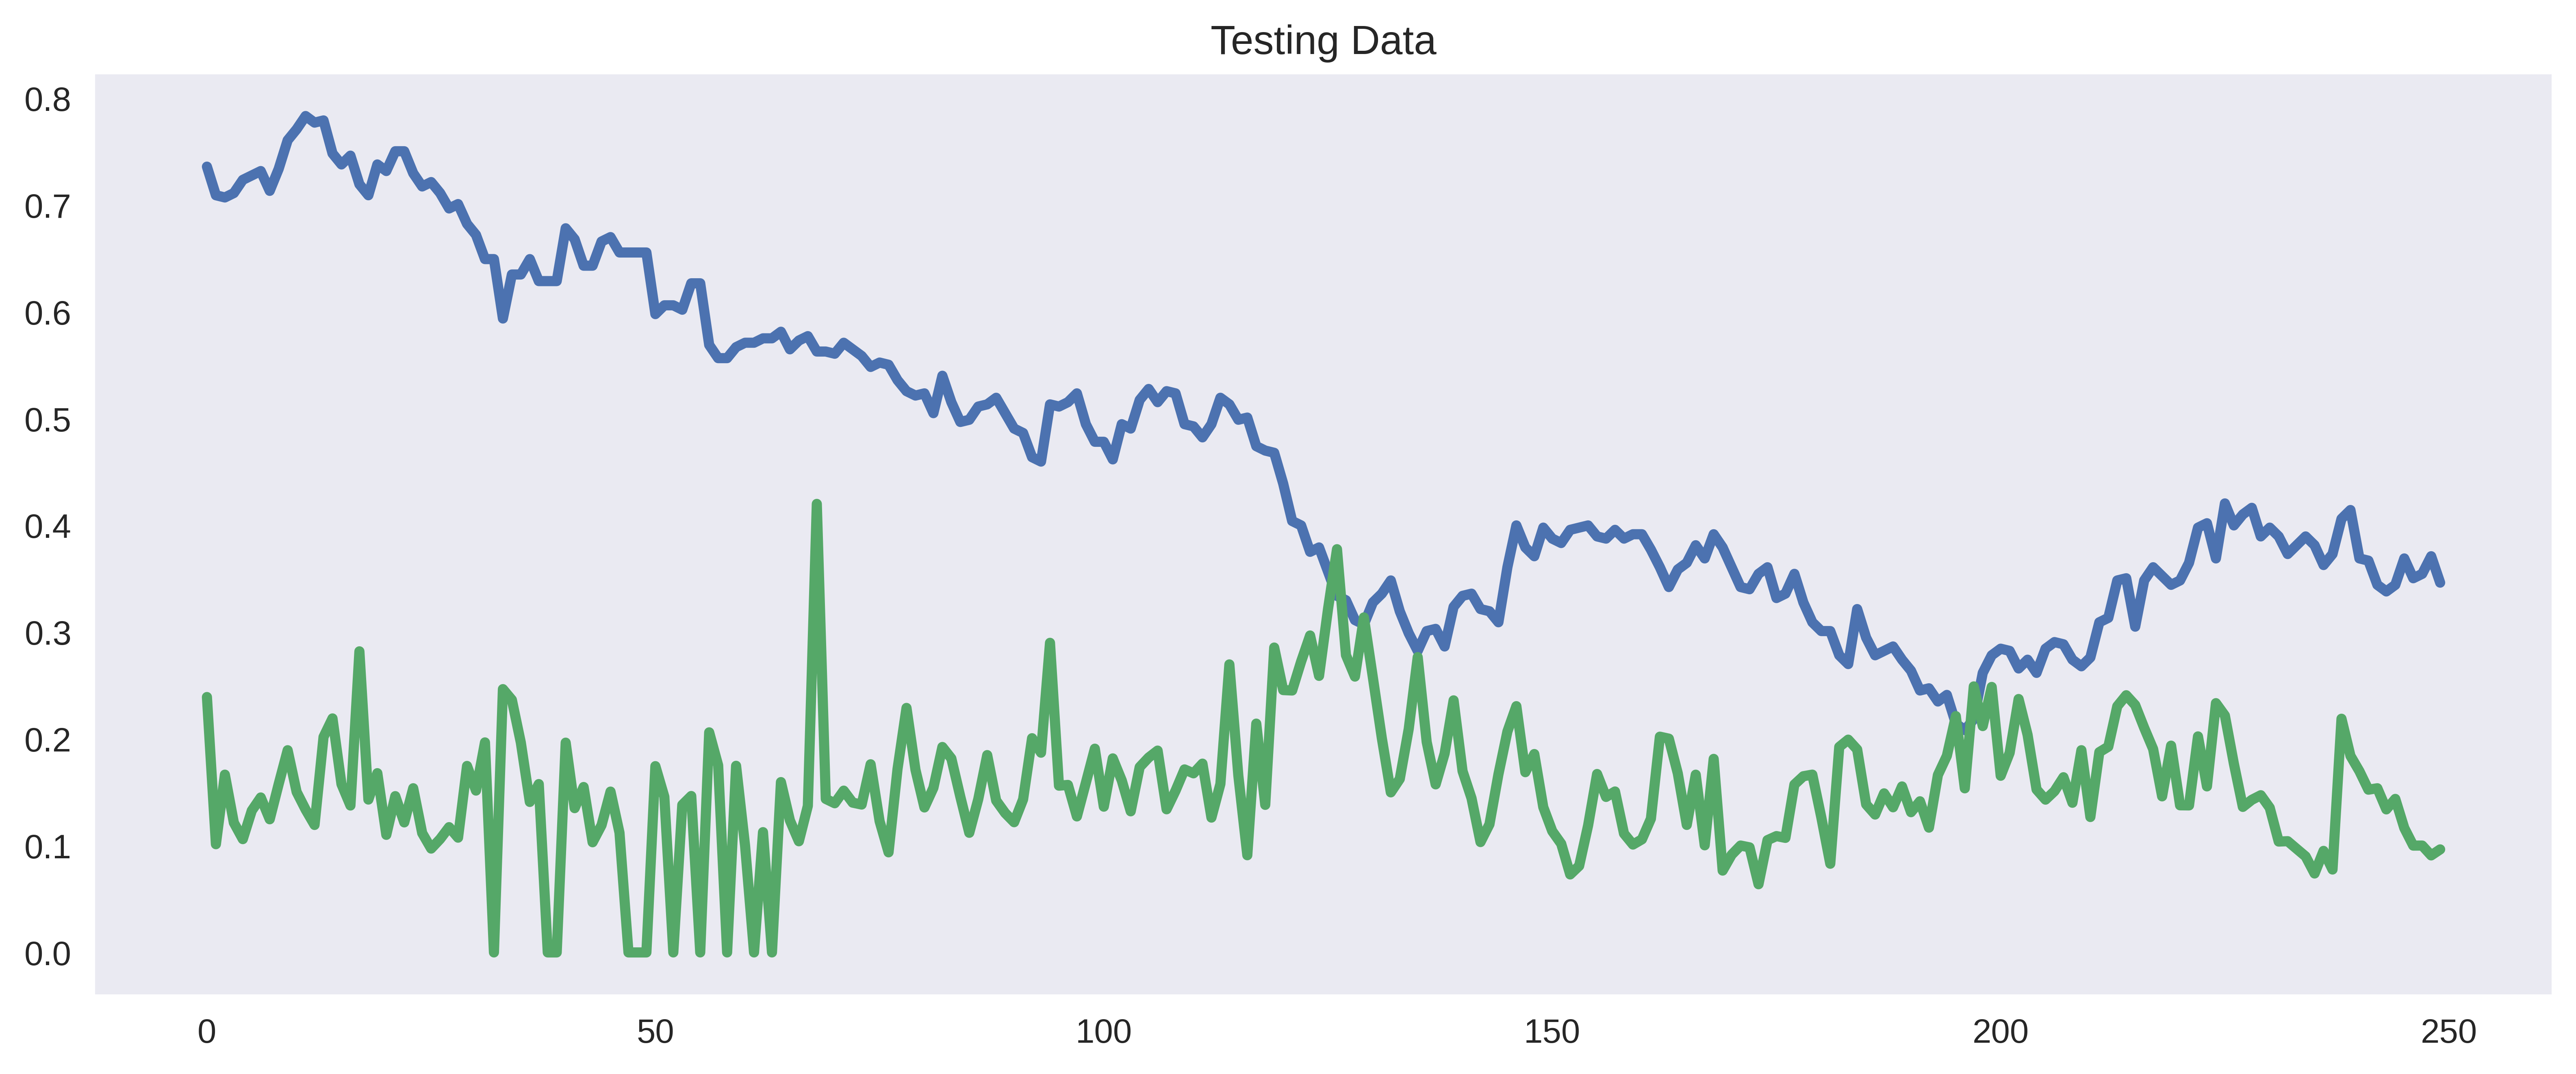

In [ ]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [ ]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()

regression_model.fit(X_train, y_train)

Ridge()

In [ ]:
# Test the model and calculate its accuracy
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.9830365930097201


In [ ]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.34350274],
       [0.34954916],
       [0.3116726 ],
       [0.29575401],
       [0.31164056],
       [0.34551274],
       [0.35748527],
       [0.38939006],
       [0.37543491],
       [0.36152994],
       [0.36553285],
       [0.37746141],
       [0.38138777],
       [0.40334296],
       [0.39741522],
       [0.3634851 ],
       [0.3714874 ],
       [0.36748848],
       [0.35156728],
       [0.30365936],
       [0.32557991],
       [0.29768729],
       [0.28576318],
       [0.25184405],
       [0.26776995],
       [0.27573539],
       [0.31561513],
       [0.32361081],
       [0.29775562],
       [0.29794461],
       [0.25978804],
       [0.20987127],
       [0.2103328 ],
       [0.16692205],
       [0.14627847],
       [0.1142391 ],
       [0.08050082],
       [0.02756525],
       [0.07642175],
       [0.01875867],
       [0.10728428],
       [0.14110467],
       [0.1242862 ],
       [0.1342652 ],
       [0.12543717],
       [0.12340704],
       [0.08461336],
       [0.104

In [ ]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [ ]:
len(Predicted)

714

In [ ]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [ ]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2020-01-28
1,2020-01-29
2,2020-01-30
3,2020-01-31
4,2020-02-03
...,...
709,2022-12-09
710,2022-12-12
711,2022-12-13
712,2022-12-14


In [ ]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2020-01-28,0.336082
1,2020-01-29,0.342268
2,2020-01-30,0.303093
3,2020-01-31,0.286598
4,2020-02-03,0.303093
...,...,...
709,2022-12-09,0.369072
710,2022-12-12,0.350515
711,2022-12-13,0.354639
712,2022-12-14,0.371134


In [ ]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2020-01-28,0.336082,0.343503
1,2020-01-29,0.342268,0.349549
2,2020-01-30,0.303093,0.311673
3,2020-01-31,0.286598,0.295754
4,2020-02-03,0.303093,0.311641
...,...,...,...
709,2022-12-09,0.369072,0.375494
710,2022-12-12,0.350515,0.357589
711,2022-12-13,0.354639,0.361571
712,2022-12-14,0.371134,0.377509


In [ ]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [ ]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

Red neuronal

TRAIN AN LSTM TIME SERIES MODEL

In [ ]:
data

,Date,Close,Volume,Target
0,2020-01-28,58800.0,23664541,59100.0
1,2020-01-29,59100.0,16446102,57200.0
2,2020-01-30,57200.0,20821939,56400.0
3,2020-01-31,56400.0,19749457,57200.0
4,2020-02-03,57200.0,23995260,58900.0
...,...,...,...,...
710,2022-12-12,59500.0,9036472,59700.0
711,2022-12-13,59700.0,9040873,60500.0
712,2022-12-14,60500.0,8207485,59300.0
713,2022-12-15,59300.0,8716039,59500.0


In [ ]:
price_volume_df = data
price_volume_df

,Date,Close,Volume,Target
0,2020-01-28,58800.0,23664541,59100.0
1,2020-01-29,59100.0,16446102,57200.0
2,2020-01-30,57200.0,20821939,56400.0
3,2020-01-31,56400.0,19749457,57200.0
4,2020-02-03,57200.0,23995260,58900.0
...,...,...,...,...
710,2022-12-12,59500.0,9036472,59700.0
711,2022-12-13,59700.0,9040873,60500.0
712,2022-12-14,60500.0,8207485,59300.0
713,2022-12-15,59300.0,8716039,59500.0


In [ ]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[   58800., 23664541.],
       [   59100., 16446102.],
       [   57200., 20821939.],
       ...,
       [   60500.,  8207485.],
       [   59300.,  8716039.],
       [   59500., 13033596.]])

In [ ]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [ ]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [ ]:
X

[array([0.33608247]),
 array([0.34226804]),
 array([0.30309278]),
 array([0.28659794]),
 array([0.30309278]),
 array([0.33814433]),
 array([0.35051546]),
 array([0.38350515]),
 array([0.36907216]),
 array([0.35463918]),
 array([0.35876289]),
 array([0.37113402]),
 array([0.37525773]),
 array([0.39793814]),
 array([0.39175258]),
 array([0.35670103]),
 array([0.36494845]),
 array([0.36082474]),
 array([0.3443299]),
 array([0.29484536]),
 array([0.31752577]),
 array([0.28865979]),
 array([0.27628866]),
 array([0.24123711]),
 array([0.25773196]),
 array([0.26597938]),
 array([0.30721649]),
 array([0.31546392]),
 array([0.28865979]),
 array([0.28865979]),
 array([0.24948454]),
 array([0.19793814]),
 array([0.19793814]),
 array([0.15360825]),
 array([0.13195876]),
 array([0.09896907]),
 array([0.06391753]),
 array([0.00927835]),
 array([0.05979381]),
 array([0.]),
 array([0.09175258]),
 array([0.12680412]),
 array([0.10927835]),
 array([0.11958763]),
 array([0.11030928]),
 array([0.10824742]

In [ ]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [ ]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [ ]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((499, 1, 1), (215, 1, 1))

In [ ]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [ ]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
13/13 [==============================] - 14s 150ms/step - loss: 0.2908 - val_loss: 0.2665
Epoch 2/20
13/13 [==============================] - 0s 15ms/step - loss: 0.1172 - val_loss: 0.0018
Epoch 3/20
13/13 [==============================] - 0s 16ms/step - loss: 0.0421 - val_loss: 0.0070
Epoch 4/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0317 - val_loss: 0.0064
Epoch 5/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0202 - val_loss: 9.2305e-04
Epoch 6/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0117 - val_loss: 0.0016
Epoch 7/20
13/13 [==============================] - 0s 16ms/step - loss: 0.0064 - val_loss: 4.7198e-04
Epoch 8/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0035 - val_loss: 5.3613e-04
Epoch 9/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0030 - val_loss: 0.0012
Epoch 10/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0030 - val_loss: 8.

In [ ]:
# Make prediction
predicted = model.predict(X)

23/23 [==============================] - 1s 4ms/step


In [ ]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [ ]:
test_predicted

[0.32360467,
 0.32917708,
 0.2941131,
 0.27951175,
 0.2941131,
 0.32546052,
 0.33662823,
 0.36667317,
 0.3534811,
 0.3403628,
 0.34410343,
 0.35536122,
 0.35912588,
 0.37993887,
 0.37424457,
 0.34223232,
 0.34972546,
 0.34597594,
 0.33103764,
 0.28680038,
 0.3069682,
 0.28133166,
 0.2704348,
 0.23985429,
 0.25419098,
 0.26139542,
 0.29777846,
 0.3051273,
 0.28133166,
 0.28133166,
 0.24701065,
 0.20267755,
 0.20267755,
 0.16530026,
 0.14729734,
 0.12018024,
 0.0917851,
 0.048374318,
 0.08847266,
 0.04110535,
 0.11429913,
 0.14303517,
 0.12861341,
 0.13708378,
 0.12945877,
 0.12776843,
 0.09510348,
 0.11178425,
 0.11513817,
 0.14388683,
 0.159281,
 0.14218384,
 0.15071379,
 0.15328003,
 0.13708378,
 0.14900482,
 0.14900482,
 0.19043225,
 0.16788554,
 0.15328003,
 0.1635786,
 0.1635786,
 0.15499273,
 0.1635786,
 0.16788554,
 0.16616164,
 0.14048232,
 0.15242423,
 0.14559135,
 0.14559135,
 0.13878231,
 0.13030452,
 0.1413329,
 0.1319971,
 0.12945877,
 0.14559135,
 0.17133784,
 0.16616164,


In [ ]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2020-01-29
2,2020-01-30
3,2020-01-31
4,2020-02-03
5,2020-02-04
...,...
710,2022-12-12
711,2022-12-13
712,2022-12-14
713,2022-12-15


In [ ]:
df_predicted['predictions'] = test_predicted

In [ ]:
df_predicted

,Date,predictions
1,2020-01-29,0.323605
2,2020-01-30,0.329177
3,2020-01-31,0.294113
4,2020-02-03,0.279512
5,2020-02-04,0.294113
...,...,...
710,2022-12-12,0.353481
711,2022-12-13,0.336628
712,2022-12-14,0.340363
713,2022-12-15,0.355361


In [ ]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [ ]:
df_predicted['Close'] = close[1:]

In [ ]:
df_predicted

,Date,predictions,Close
1,2020-01-29,0.323605,0.342268
2,2020-01-30,0.329177,0.303093
3,2020-01-31,0.294113,0.286598
4,2020-02-03,0.279512,0.303093
5,2020-02-04,0.294113,0.338144
...,...,...,...
710,2022-12-12,0.353481,0.350515
711,2022-12-13,0.336628,0.354639
712,2022-12-14,0.340363,0.371134
713,2022-12-15,0.355361,0.346392


In [ ]:
# Plot the data
interactive_plot(df_predicted, "Original Vs LSTM Prediction")